In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day12.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/ryct.2020200034.fig5-day4.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/ryct.2020200034.fig5-day0.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-day17.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/ryct.2020200034.fig2.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/streptococcus-pneumoniae-pneumonia-temporal-evolution-1-day3.jpg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PN

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

train_dir='/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train'
test_dir='/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test'

/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


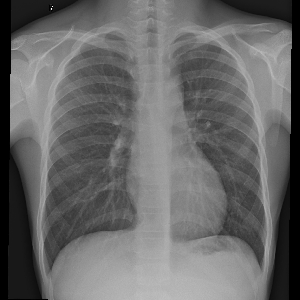

In [3]:
tf.keras.preprocessing.image.load_img(
    '../input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0052-0001.jpeg', grayscale=True, color_mode="grayscale", target_size=(300,300), interpolation="nearest"
)

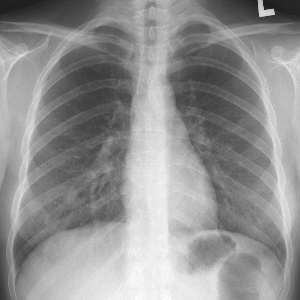

In [4]:
tf.keras.preprocessing.image.load_img(
    '../input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day7.jpeg', grayscale=True, color_mode="grayscale", target_size=(300,300), interpolation="nearest"
)

# Data Preprocessing (Augmentation)

In [5]:
train_datagen = ImageDataGenerator(rescale = 1.0/255, 
                                   shear_range = 0.1, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True, 
                                   featurewise_center=True,
                                   featurewise_std_normalization=True,
                                   width_shift_range=0.10,
                                   height_shift_range=0.10)
training_set = train_datagen.flow_from_directory(train_dir, 
                                                 target_size = (1000,1000), 
                                                 batch_size = 32, 
                                                 color_mode = 'grayscale' , 
                                                 class_mode = 'binary')

Found 148 images belonging to 2 classes.


In [6]:
test_datagen = ImageDataGenerator(rescale = 1.0/255)
test_set = train_datagen.flow_from_directory(test_dir, 
                                             target_size =(1000,1000), 
                                             batch_size = 32, 
                                             color_mode = 'grayscale', 
                                             class_mode = 'binary')

Found 40 images belonging to 2 classes.


In [7]:
from tensorflow.keras.callbacks import EarlyStopping
callbacks = EarlyStopping(
    monitor="val_acc",
    patience=3,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

# Building the CNN

In [8]:
#Initializing CNN
cnn = tf.keras.models.Sequential()

2022-06-21 15:57:59.086166: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [9]:
#------------------------------1st Layer------------------------------#
# Convolution
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 5, activation = 'relu', input_shape = [1000,1000,1]))
#Pooling
#cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 5, strides = 5))
#cnn.add(tf.keras.layers.Dropout(0.25))

In [10]:
#------------------------------2nd Layer------------------------------#
# Convolution
cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 5, activation = 'relu'))
#Pooling
#cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 5, strides = 5))
#cnn.add(tf.keras.layers.Dropout(0.25))

In [11]:
#------------------------------3rd Layer------------------------------#
# Convolution
cnn.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = 5, activation = 'relu'))
#Pooling
#cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 5, strides = 5))
#cnn.add(tf.keras.layers.Dropout(0.25))

In [12]:
#Flattening
cnn.add(tf.keras.layers.Flatten())

In [13]:
#Full Connection

#Hidden Layers
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
#cnn.add(tf.keras.layers.BatchNormalization())
#cnn.add(tf.keras.layers.Dropout(0.25))

In [14]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [15]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 996, 996, 32)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 199, 199, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 195, 195, 64)      51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 39, 39, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 35, 35, 128)       204928    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

# Compiling and Running

In [16]:
#Compiling
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#Training and evaluating
output = cnn.fit(x = training_set, validation_data = test_set, epochs = 9, callbacks = callbacks)

/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
2022-06-21 15:58:03.956652: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/9
5/5 [==============================] - 71s 15s/step - loss: 0.7155 - accuracy: 0.5676 - val_loss: 0.6860 - val_accuracy: 0.7750
Epoch 2/9
5/5 [==============================] - 56s 10s/step - loss: 0.6919 - accuracy: 0.5878 - val_loss: 0.6412 - val_accuracy: 0.9250
Epoch 3/9
5/5 [==============================] - 57s 11s/step - loss: 0.6387 - accuracy: 0.7635 - val_loss: 0.6224 - val_accuracy: 0.5000
Epoch 4/9
5/5 [==============================] - 55s 11s/step - loss: 0.6414 - accuracy: 0.6419 - val_loss: 0.4568 - val_accuracy: 0.9500
Epoch 5/9
5/5 [==============================] - 55s 10s/step - loss: 0.4338 - accuracy: 0.8243 - val_loss: 0.3429 - val_accuracy: 0.8250
Epoch 6/9
5/5 [==============================] - 55s 12s/step - loss: 0.3342 - accuracy: 0.8784 - val_loss: 0.0986 - val_accuracy: 0.9500
Epoch 7/9
5/5 [==============================] - 54s 10s/step - loss: 0.3121 - accuracy: 0.8514 - val_loss: 0.1713 - val_accuracy: 0.9250
Epoch 8/9
5/5 [===================

2/2 - 5s - loss: 0.1513 - accuracy: 0.9500


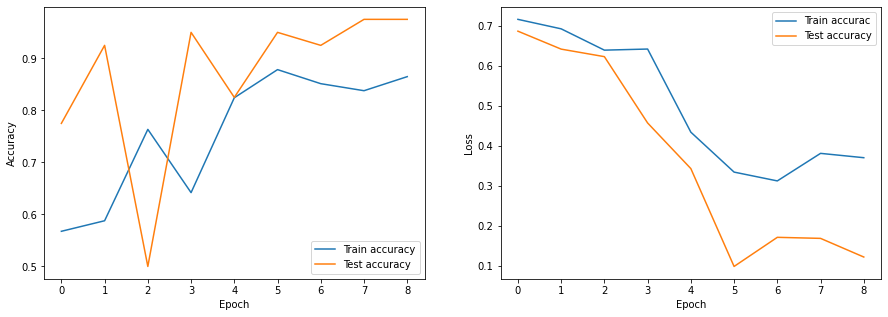

In [17]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.plot(output.history['accuracy'], label='accuracy')
plt.plot(output.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train accuracy','Test accuracy'], loc='lower right')

plt.subplot(1,2,2)
plt.plot(output.history['loss'], label='loss')
plt.plot(output.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train accurac','Test accuracy'], loc='upper right')

test_loss, test_acc = cnn.evaluate(test_set, verbose=2)

In [18]:
image = tf.keras.preprocessing.image.load_img('../input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/ryct.2020200034.fig2.jpeg',target_size=(1000,1000), grayscale=True, color_mode="grayscale")
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
if cnn.predict(input_arr) == 1:
    print ("Omicron Positive")
else:
    print ("Omicron Negative")

Omicron Positive
